# 1. İki sürekli değişkenin iki değişkenli analizi

### 1.1. Dağılım grafiği
İki sürekli değişken arasındaki ilişkiye bakmanın en bilgilendirici yollarından biri dağılım grafiklerini çizmektir (scattergram olarak da bilinir). Örneğin, ilk değişkenin değerinin genellikle ikincisinin değeri arttığı zaman arttığını görürsek, bu, bu iki değişken arasında pozitif bir ilişki olduğunu gösterir.

Buna Youtube veri kümesini kullanarak bakalım.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
youtube = pd.read_csv("youtube_winsorize.csv", index_col=0)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_aboneler,winsorize_goruntulenme
0,1st,A++,Zee TV,82757.000,18752952.000,20869786591,5653.000,5895361.000,2468241402
1,2nd,A++,T-Series,12661.000,61196304.000,47548839843,5653.000,5895361.000,2468241402
2,3rd,A++,Cocomelon - Nursery Rhymes,373.000,19238252.000,9793305082,373.000,5895361.000,2468241402
3,4th,A++,SET India,27323.000,31180560.000,22675948293,5653.000,5895361.000,2468241402
4,5th,A++,WWE,36756.000,32852346.000,26273668433,5653.000,5895361.000,2468241402


video_sayisi, goruntulenme_sayisi ve abone_sayisi arasındaki ilişkileri ikili olarak görselleştirelim.

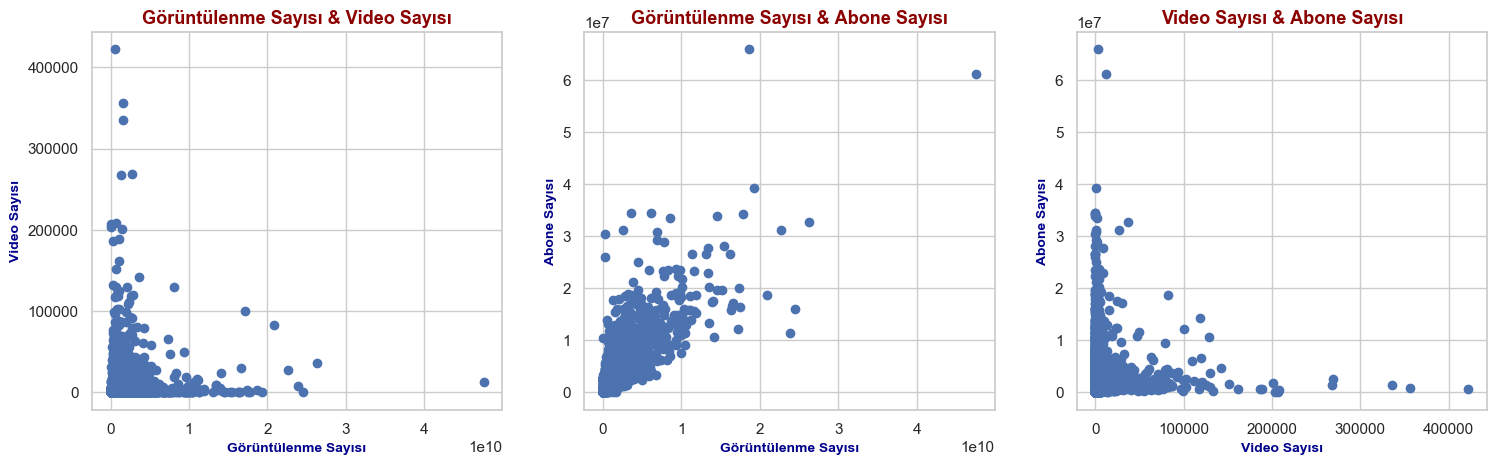

In [4]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(youtube["goruntulenme_sayisi"], youtube["video_sayisi"])
plt.title("Görüntülenme Sayısı & Video Sayısı", fontdict=baslik_font)
plt.xlabel('Görüntülenme Sayısı', fontdict=eksen_font )
plt.ylabel('Video Sayısı', fontdict=eksen_font )


plt.subplot(1,3,2)
plt.scatter(youtube["goruntulenme_sayisi"], youtube["abone_sayisi"])
plt.title("Görüntülenme Sayısı & Abone Sayısı", fontdict=baslik_font)
plt.xlabel('Görüntülenme Sayısı', fontdict=eksen_font )
plt.ylabel('Abone Sayısı', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(youtube["video_sayisi"], youtube["abone_sayisi"])
plt.title("Video Sayısı & Abone Sayısı", fontdict=baslik_font)
plt.xlabel('Video Sayısı', fontdict=eksen_font )
plt.ylabel('Abone Sayısı', fontdict=eksen_font )

plt.show()

İkinci dağılım grafiğinde, video görünümleriyle abone sayısı arasında pozitif bir ilişki görüyoruz. Şimdi, sınav puanlarını kullanarak öğrenci sınav performansı veri kümesinde aynı ilişkiye bakalım.

In [5]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


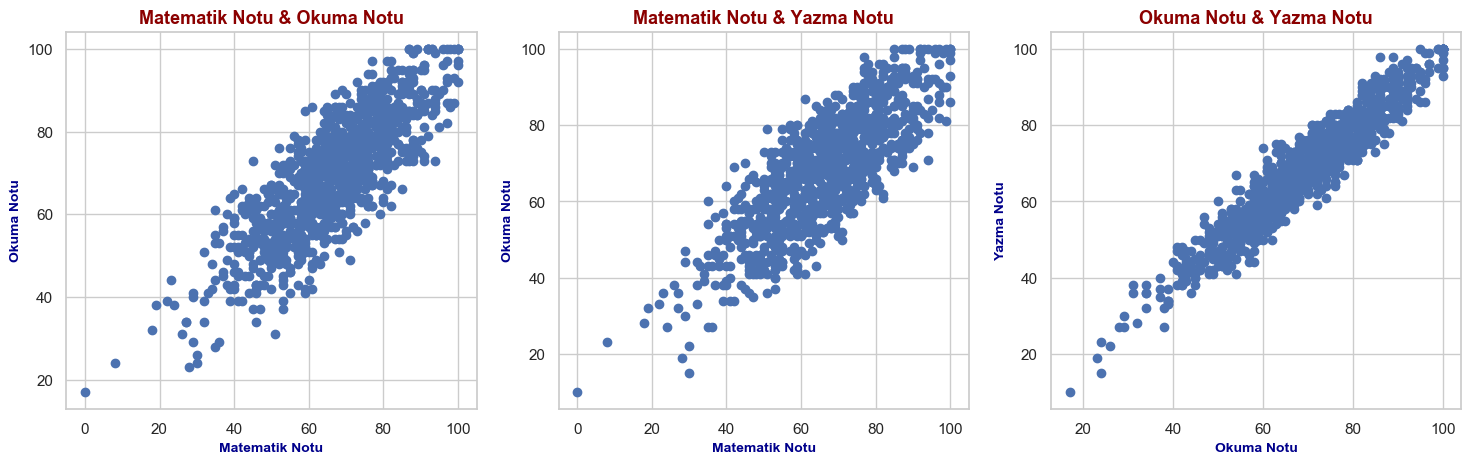

In [6]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(ogrenciler["matematik_notu"], ogrenciler["okuma_notu"])
plt.title("Matematik Notu & Okuma Notu", fontdict=baslik_font )
plt.xlabel('Matematik Notu', fontdict=eksen_font )
plt.ylabel('Okuma Notu', fontdict=eksen_font )

plt.subplot(1,3,2)
plt.scatter(ogrenciler["matematik_notu"], ogrenciler["yazma_notu"])
plt.title("Matematik Notu & Yazma Notu", fontdict=baslik_font )
plt.xlabel('Matematik Notu', fontdict=eksen_font )
plt.ylabel('Okuma Notu', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(ogrenciler["okuma_notu"], ogrenciler["yazma_notu"])
plt.title("Okuma Notu & Yazma Notu", fontdict=baslik_font )
plt.xlabel('Okuma Notu', fontdict=eksen_font )
plt.ylabel('Yazma Notu', fontdict=eksen_font )

plt.show()

Evet! Başarı bir şans değil, çalışarak elde edilir! Tüm puan türleri arasında pozitif bir ilişki olduğunu görüyoruz.

Aykırı değerler hakkında bir not: Aykırı değerleri açıkladığımız derste, yalnızca her değişken için ayrı ayrı aykırı değerlere baktığımızı hatırlayın. Sıradışı değer kombinasyonlarını temsil eden iki boyutlu aykırı değer olarak adlandırılabilecek başka bir aykırı değer türü de vardır. Yukarıdaki dağılım grafiklerine dikkatlice bakarsanız, bu olağandışı değer çiftlerinden bazılarını fark edebilirsiniz. Bunları ele almak için, o derslerde açıkladığımız tekniklerden birini uygulayabilirsiniz.

# 1.2. Korelasyon katsayısı
İki sürekli değişkenin birlikteliğini ölçen bir başka bilgilendirici istatistik de korelasyon katsayısı'dır. Korelasyon katsayısı (r), iki sürekli değişken arasındaki doğrusal ilişkinin sayısal bir temsilidir. Korelasyonlar -1, (bir değişkende değerler yükseldikçe, diğerinde değerler azalır) 0 (değişkenler arasında ilişki yok) ve 1 (bir değişkende değerler yükselirken, diğerindeki değerler de artar) arasında değişir.

Dağılım grafiklerinde gözlemlediklerimizin aslında değişkenler arasındaki ilişkilere dair görsel bir işaret olduğuna dikkat edin. Sayıların kullanılması bizi bir adım daha ileri götürecektir, çünkü şimdi iki değişken arasındaki ilişkiyi -1 ve 1 arasındaki büyüklükleri kullanarak ölçebiliriz.

Pandas, sürekli özellikler arasındaki korelasyon katsayılarını çıkarmak için bize .corr() metodunu sunar. Bu fonksiyonu hem Youtube hem de öğrenci performansı veri kümelerine uygulayalım.

In [7]:
youtube.corr()

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_aboneler,winsorize_goruntulenme
video_sayisi,1.000,0.011,0.092,0.474,0.013,0.135
abone_sayisi,0.011,1.000,0.784,0.083,0.778,0.627
goruntulenme_sayisi,0.092,0.784,1.000,0.219,0.579,0.700
winsorize_video_sayisi,0.474,0.083,0.219,1.000,0.098,0.308
winsorize_aboneler,0.013,0.778,0.579,0.098,1.000,0.743
winsorize_goruntulenme,0.135,0.627,0.700,0.308,0.743,1.000


In [8]:
ogrenciler.corr()

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


Görüntülenme sayıları ile abone sayıları arasındaki korelasyonun 0,78 civarında olduğunu ve okuma ile yazma skorları arasındaki korelasyonun diğer kombinasyonlardan daha yüksek olduğunu görüyoruz.

Korelasyonlara bakmanın diğer bir uygun yolu Pearson korelasyon matrisini kullanmaktır. Bu, özellikle veri kümesinde çok fazla değişkenimiz olduğunda kullanışlı olan bir görselleştirme tekniğidir. Genellikle, açık renkler değişkenler arasında daha yüksek bir korelasyon olduğunu gösterir. Öyleyse, her iki veri kümemiz için korelasyon matrislerini çizelim:

Bunun için Matplotlib benzeri bir görselliştirme kütüphanesi olan Seaborn kütüphanesini kullanacağız. Önce korelasyon matrislerini oluşturalım.


In [9]:
korelasyon_mat_youtube = youtube.corr()
korelasyon_mat_ogrenciler = ogrenciler.corr()
display(korelasyon_mat_youtube, korelasyon_mat_ogrenciler)

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_aboneler,winsorize_goruntulenme
video_sayisi,1.000,0.011,0.092,0.474,0.013,0.135
abone_sayisi,0.011,1.000,0.784,0.083,0.778,0.627
goruntulenme_sayisi,0.092,0.784,1.000,0.219,0.579,0.700
winsorize_video_sayisi,0.474,0.083,0.219,1.000,0.098,0.308
winsorize_aboneler,0.013,0.778,0.579,0.098,1.000,0.743
winsorize_goruntulenme,0.135,0.627,0.700,0.308,0.743,1.000


,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


Korelasyonu göstermek için kullanılabilecek güzel bir araç olan Seaborn kütüphanesindeki heatmap grafiğini kullanalım. Buradan elde ettiğiniz görünümleri yukarıda oluşturduğumuz scatter plot ile karşılaştırabilirsiniz.

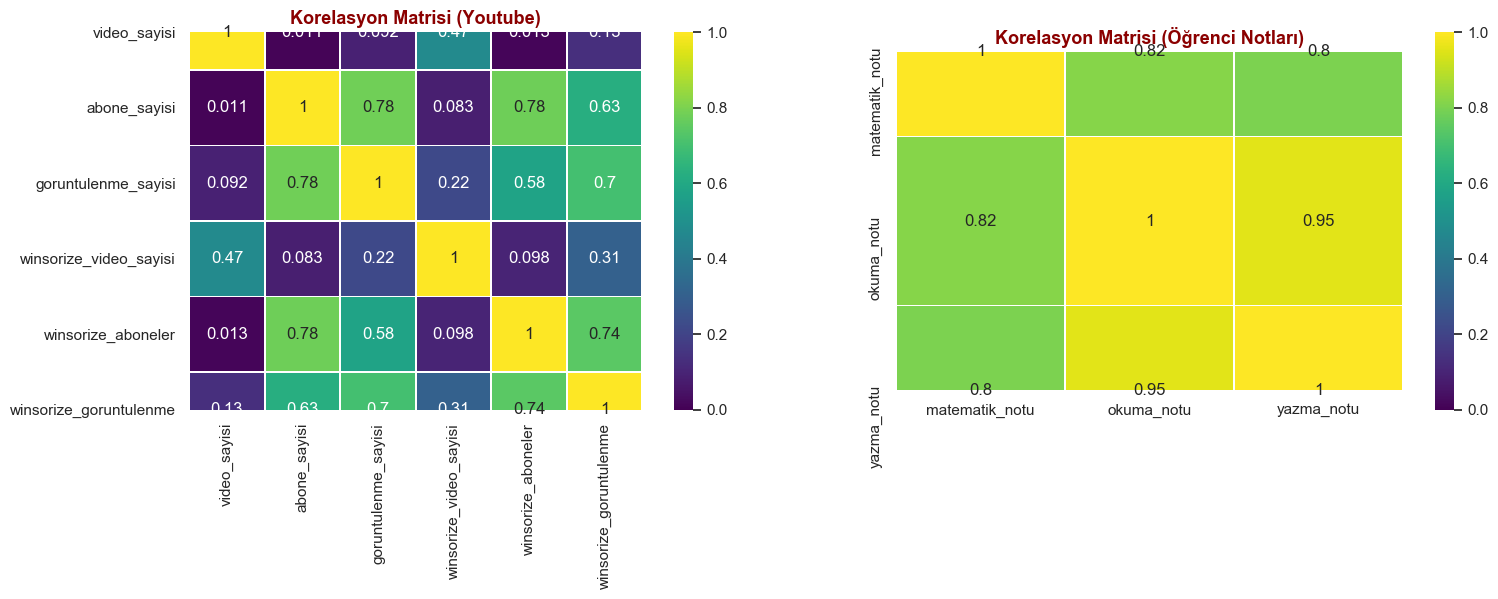

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(korelasyon_mat_youtube, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Youtube)", fontdict=baslik_font)

plt.subplot(1,2,2)
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()

# 2. Sürekli ve kategorik bir çiftin iki değişkenli analizi
Sürekli ve kategorik bir değişken çifti analiz ettiğimizde, kategorik değerin her bir değeri için genellikle sürekli değişkenin bazı ölçümlerine bakarız. Kategoriler arasında farklı değerler gözlemlersek, bu kategorik değişkenin sürekli değişkenle ilgili bazı önemli bilgilere sahip olduğunu gösterir.

Buna bakmanın bir yolu, kategorik değişkeni gruplamada kullandığımız Pandas'ın .groupby() metodunu kullanmaktır. Bu metoddan sonra, sürekli değişken için metrikleri türetmek için .mean() veya .count() gibi bazı küme fonksiyonlarını çağırabiliriz. Bunu Youtube veri kümesinde kategorik değişken olarak derece değişkenini kullanarak yapalım:

In [11]:
youtube.groupby("derece").mean()

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_aboneler,winsorize_goruntulenme
derece,,,,,,
A,5353.923,4931877.510,2356715490.963,1675.312,3398754.609,1447001618.042
A+,16547.927,11504827.171,6053120621.049,2729.878,5061679.000,2088445273.927
A++,37450.700,22281762.900,21199091192.800,4673.700,5590006.000,2468241402.000
A-,4136.515,2784051.111,1041149249.383,1319.477,2329109.536,881069334.142
B+,2987.169,1620059.628,525915832.166,1120.131,1513428.975,508566805.330


Gördüğümüz gibi değişkenlerin ortalamalarında grade grupları arasında farklılıklar var. Tek bir metriğe bakmak yerine, .groupby() metodundan sonra .describe() metodunu da çağırabiliriz. Her ne kadar bu çok faydalı olsa da, elde edilen tabloyu birçok sürekli değişkene sahip veri kümelerinde analiz etmek sıkıcı olabilir.

Görselleştirme, sürekli ve kategorik değişken çiftleri analiz etmemize de yardımcı olabilir. Sürekli değişkenin kategorik değişken grupları arasındaki farklarını görselleştirmek için kutu, çubuk veya başka bir çeşit grafik kullanabiliriz.

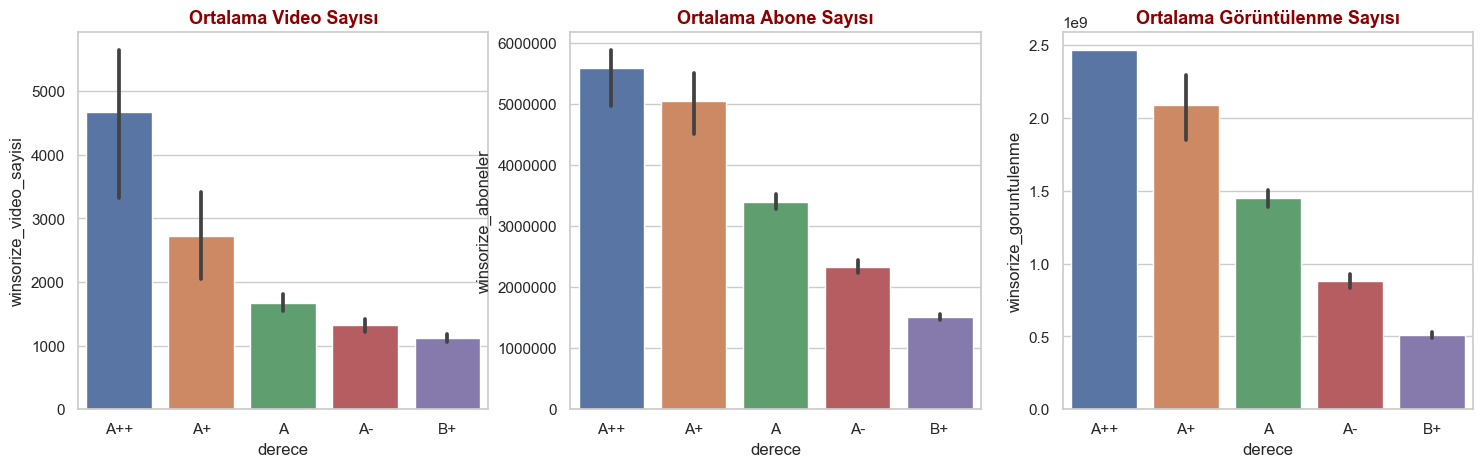

In [12]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(youtube["derece"], youtube["winsorize_video_sayisi"])
plt.title("Ortalama Video Sayısı", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(youtube["derece"], youtube["winsorize_aboneler"])
plt.title("Ortalama Abone Sayısı", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(youtube["derece"], youtube["winsorize_goruntulenme"])
plt.title("Ortalama Görüntülenme Sayısı", fontdict = baslik_font)

plt.show()

Gördüğümüz gibi, ortalamalar not azaldıkça azalır. Ancak, farklılıkları gözlemlemek, her bir kategori arasında bazı önemli farklılıklar olduğunu söylemenin resmi bir yolu değildir! Bunu yapmanın resmi yolu, t-testi veya ANOVA kullanmaktır!. Öyleyse, farklılıkların istatistiksel olarak anlamlı olup olmadığını öğrenmek için t-test kullanalım.

In [13]:
# Test whether group differences are significant.
dereceler = youtube["derece"].unique()
grup_youtube = youtube.groupby("derece")

In [14]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_video_sayisi", "winsorize_aboneler", "winsorize_goruntulenme"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(dereceler)):
        for j in range(i+1, len(dereceler)):
            ttest = stats.ttest_ind(youtube[youtube["derece"]==dereceler[i]][var], 
                                youtube[youtube["derece"]==dereceler[j]][var])
            grup_1 = dereceler[i]
            grup_2 = dereceler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

winsorize_video_sayisi için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,2.370107597680390,0.021763528688882
1,A++,A,4.635430403314838,0.000004046915858
2,A++,A-,5.849570397069131,0.000000006610447
3,A++,B+,6.895263284493901,0.000000000006542
4,A+,A,3.226986753862891,0.001291484868968
5,A+,A-,4.847071765045587,0.000001439371760
6,A+,B+,6.250454348650543,0.000000000467265
7,A,A-,4.134406362300212,0.000037067474856
8,A,B+,8.632504468648667,0.000000000000000
9,A-,B+,3.287452883152387,0.001019753582834


winsorize_aboneler için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,0.984160033103640,0.329871570488523
1,A++,A,3.608536727425489,0.000323610742355
2,A++,A-,5.868324550537312,0.000000005926150
3,A++,B+,9.135367813318059,0.000000000000000
4,A+,A,5.471175309584620,0.000000056451392
5,A+,A-,9.808348314786624,0.000000000000000
6,A+,B+,15.969844689123493,0.000000000000000
7,A,A-,12.993330867044360,0.000000000000000
8,A,B+,32.813612334224260,0.000000000000000
9,A-,B+,14.941009954835812,0.000000000000000


winsorize_goruntulenme için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,1.569203260330293,0.123036409158845
1,A++,A,3.621975365674819,0.000307463931377
2,A++,A-,6.565929030789834,0.000000000081776
3,A++,B+,11.469859149388137,0.000000000000000
4,A+,A,4.538723264848895,0.000006344392750
5,A+,A-,9.923990388605031,0.000000000000000
6,A+,B+,18.478400874854195,0.000000000000000
7,A,A-,15.231589446072988,0.000000000000000
8,A,B+,39.285524343410707,0.000000000000000
9,A-,B+,16.964455044626160,0.000000000000000


# 3. İki kategorik değişkenin iki değişkenli analizi
Kalan son kombinasyon iki kategorik değişken çiftidir. Kategorik değişkenler, tanım gereği sınırlı sayıda farklı değerleri içerdiğinden, aradığımız en yaygın istatistik, tüm değer çiftlerinin gözlem sayılarıdır. Pandas'ın .crosstab() yöntemi bu işi bizim için yapar. Bunu öğrencilerin notları veri kümesinde kullanalım.

In [15]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
adet_tablosu = pd.crosstab(ogrenciler["cinsiyet"], ogrenciler["koken"])
adet_tablosu

koken,group A,group B,group C,group D,group E
cinsiyet,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


Her zamanki gibi, görselleştirme farklılıkları görmemize yardımcı oluyor. Her bir çubuğun yüksekliğini, iki değişkenin seviyelerinin her bir kombinasyonundaki veri noktalarının sayısının belirlediği bir çubuk grafiği aynı bilgiyi iletir.

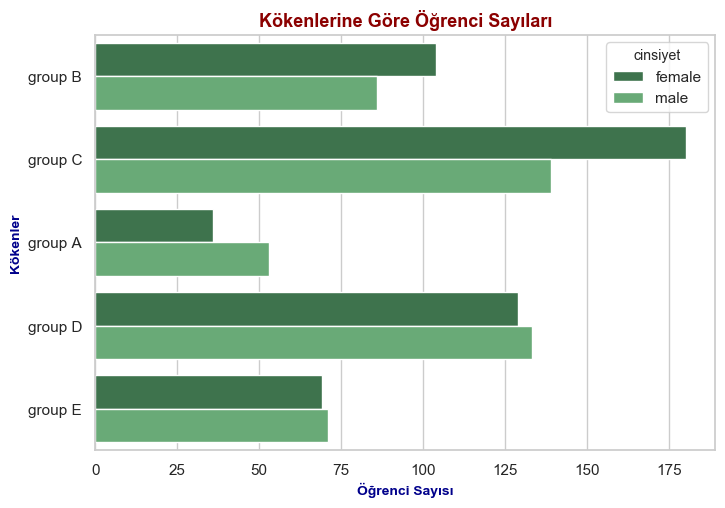

In [17]:
# Plot counts for each combination of levels.
sns.countplot(y="koken", hue="cinsiyet", data=ogrenciler, palette="Greens_d")
plt.title("Kökenlerine Göre Öğrenci Sayıları", fontdict = baslik_font)
plt.ylabel("Kökenler", fontdict = eksen_font)
plt.xlabel("Öğrenci Sayısı", fontdict = eksen_font)
plt.show()

Genel bir hatırlatma olarak, yukarıda gördüğümüz farklılıkların resmi istatistiksel testler kullanılarak haklı gösterilmesi gerektiğini unutmayın. Bu amaçla, Chi-kare testini kullanabiliriz. Bu test, bir seviye kombinasyonunun diğerlerinden önemli ölçüde küçük veya büyük olduğunu gösterir. Bu test de t-testi gibi istatistik ve p-degeri verir.

In [18]:
print(stats.chisquare(adet_tablosu, axis=None))

Power_divergenceResult(statistic=181.70000000000002, pvalue=2.237210012745866e-34)


Küçük gruplar hakkında bir not: Olağandışı iki boyutlu veri noktalarına benzer şekilde analizimizi çarpıtabilir, ayrıca diğer gruplara göre çok az değişkenliği olan gruplar ve çok az sayıda gözlem içeren gruplar bizi yanlış yönlendirir. Bu nedenle, küçük gruplar için farklılıkları yorumlamanın ihtiyatlı bir şekilde yapılması gerektiğini aklımızda tutmalıyız.

# 4. Hedef değişkeni merkeze koymak
Ders boyunca tartışmalarımızı genel tutmaya çalıştık ve tek bir değişkene odaklanmadık. Ancak, çoğu zaman tek bir değişkene özel bir vurgu yaparız. Bu en önemli değişken, anlamaya ve açıklamaya çalıştığımız değişkendir. Bu değişken hedef (target) veya sonuç (outcome) değişkeni olarak adlandırılır.

Youtube veri kümesini göz önünde bulundurun ve amacımız bir kanalın video görüntülerini tahmin etmek olsun. Bu bize bir kanalın Youtube'dan ne kadar para kazandığını tahmin etmemizi sağlayacaktır. Bu durumda, hedef değişkenimiz goruntulenme_sayisi olur ve veri kümemizdeki diğer değişkenlerin görüntülenme sayısını tahmin etmemize yardımcı olacak bazı bilgileri olup olmadığını anlamak isteriz. Bu örnekte, hedef değişkenimiz süreklidir ve iki değişkenli analizimizde, diğer değişkenlerin hedefimizle ne kadar ilişkili olduğunu anlamak için goruntulenme_sayisi değişkeninin diğer sabit değişkenlerle olan korelasyon katsayılarına bakabiliriz. Hedefimiz kategorik bir değişkense, hedefimizin diğer değişkenlerle olan ilişkilerini araştırmak için uygun teknikleri uygulayabiliriz.

Dolayısıyla, keşif analizinin merkezinde hedef değişkenimiz bulunmalıdır.

Söylendiği gibi, hiçbir şekilde çok değişkenli analizlerin bir yandan hedefi içermesi gerektiğini varsaymayız. Çünkü diğer değişkenler arasındaki ilişkileri bilmek, hedef değişken için de faydalı bir fikirdir. Bir sonraki derste göreceğimiz gibi, bir veri bilimi projesindeki önemli şeylerden biri, modellerimizi mümkün olduğunca az bilgi kaybederek mümkün olduğu kadar küçük değişkenlerle beslemektir. Elbette, bu bir takastır ve diğer özelliklerin varlığında en az kullanışlı olan özellikleri tespit ederek dengeyi bozarız.

Hedeflerin sayısına ilişkin bir not: Veri bilimi projelerinin çoğunda yalnızca tek bir hedefimiz olmasına rağmen, bazı durumlarda birden fazla hedefimizin olması da mümkündür. Burada, bu durumların nadir olduğu ve genellikle bootcamp kapsamı dışındaki bazı ileri teknikleri gerektirdiğini belirtmek istiyoruz.